In [1]:
# load
import dill
dill.load_session('./../saves/dill_dummy_dump.db')
print(ans)

[ 60 120 240 300 480]


In [4]:
import dill
import numpy as np
from numba import njit
from matplotlib import pyplot as plt

def scale_lr(epochs = 1200, restartfactor= 0.20, scaling=2):
    restartfactor = 1.0 if restartfactor == 0 else restartfactor
    budget = 1.00
    scale, idx = 1, 0
    lengths = np.zeros(int(1//restartfactor), dtype=np.int32)
    while True:
        tempscales = np.array([restartfactor, scaling, restartfactor*scaling])*scale
        lengths[idx] = np.round(tempscales[0] * epochs, 0)
        budget -= tempscales[0]
        scale = tempscales[1] if tempscales[-1] < budget else budget/restartfactor
        if budget < 1e-32:
            break
        idx += 1 
    lengths = np.sort(lengths[lengths > 0])
    return lengths
ans = scale_lr(restartfactor = 0.05)
ans

array([ 60, 120, 240, 300, 480], dtype=int32)

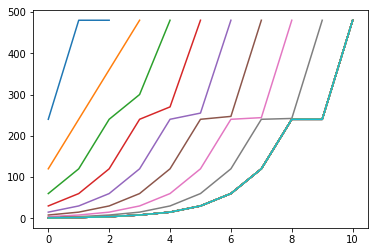

In [5]:
x = 0.2
while True:
    plt.plot(scale_lr(restartfactor = x))
    x *= 0.5
    if x < 1/(2**32):
        break

In [6]:
dill.dump_session('./../saves/dill_dummy_dump.db')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9), sharex=True, sharey=True)
X = Variable(tc.Tensor(X_mlp_train), requires_grad=False).pin_memory().cuda()
Y = Variable(tc.Tensor(Y_mlp_train), requires_grad=False).view(-1, 1).pin_memory().cuda()
fit(testmodel, X, Y, epochs=600, schedkey='hypertan', lr=0.1, restartfactor = 0.05, lr_rescale=0.96)
fit(testmodel, X, Y, epochs=600, schedkey='cosine', lr=0.1, restartfactor = 0.05, lr_rescale=0.96)
ax.legend(loc='upper right', fontsize='xx-large')
plt.title("'hypertan' and 'cosine' Cyclic LRs with incremental cycle length ordering", fontsize='xx-large')
plt.grid(which='major', color='gray', linestyle='--')